In [5]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import math

from pandas import read_csv
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import pylab

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

In [6]:
dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv')
dataframe
print(dataframe.shape)
print(dataframe.head(n=4))


(1272, 14)
  Steel     C    Si    Mn    Cr   Mo    Ni   Al    Cu  ppmB       Pa     Rc  \
0  GA01  0.13  0.27  0.22  0.08  0.0  0.06  0.0  0.22   0.0  1132.36  60.00   
1  GA01  0.13  0.27  0.22  0.08  0.0  0.06  0.0  0.22   0.0  1132.36   8.50   
2  GA01  0.13  0.27  0.22  0.08  0.0  0.06  0.0  0.22   0.0  1132.36   0.65   
3  GA01  0.13  0.27  0.21  0.08  0.0  0.06  0.0  0.22   0.0  1132.36   0.05   

       lnRc  Texp  
0  4.094345   770  
1  2.140066   805  
2 -0.430783   825  
3 -2.995732   840  


In [7]:
# y1 = b_0 + b_1{X_1}   + b_2{X_2}   +  b_3{X_3}    +  b_4{X_4}       .    .      .    b_k{X_k}
# y2 = b_0 + b_1{X_1_1} + b_2{X_1_2} +  b_3{X_1_3}  +  b_4{X_1_4}     .    .      .      .
# y3 = b_0 + b_1{X_2_1} + b_2{X_2_2} +  b_3{X_2_3}  +  b_4{X_2_4}     .    .      .      .
# y4 = b_0 + b_1{X_3_1} + b_2{X_3_2} +  b_3{X_3_3}  +  b_4{X_3_4}     .    .      .      .
# .     .       .             .             .              .          .    .      .      .
# .     .       .             .             .              .          .    .      .      .

# yn = b_0 +    .             .             .              .          .    .      .     b_k{X_n_k}



#y=texp       b_0       X_1=C        X_2=Si           X_3=Mn           X_4=Cr

# 770    =    b_0  +   b_1{0.13}   + b_2{0.27}   +  b_3{0.22}    +    b_4{0.8}
# 805    =    b_0  +   b_1{0.13}   + b_2{0.27}   +  b_3{0.22}    +    b_4{0.8}
# 825    =    b_0  +   b_1{0.13}   + b_2{0.27}   +  b_3{0.22}    +    b_4{0.8}
# 840    =    b_0  +   b_1{0.13}   + b_2{0.27}   +  b_3{0.21}    +    b_4{0.8}

#intercept
#coef of the regressors


In [8]:
data = pd.DataFrame.values
x = dataframe.iloc[:, 1:-1]
y = dataframe.iloc[:, -1]


x=x.astype(float)
y=y.astype(float)

x

,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc
0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,60.000,4.094345
1,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,8.500,2.140066
2,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.650,-0.430783
3,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.050,-2.995732
4,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.004,-5.521461
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,6.000,1.791759
1268,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,3.000,1.098612
1269,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,1.500,0.405465
1270,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,1286.59,1.500,0.405465


In [9]:
#finding the correlations between the regressors\\\pandas
corr=x.corr()
corr

,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc
C,1.000000,0.423557,-0.024671,-0.040512,0.078595,-0.127049,0.020240,-0.084688,-0.385890,-0.327897,-0.052516,-0.161332
Si,0.423557,1.000000,0.274375,-0.151363,-0.075460,-0.137054,-0.069377,-0.092396,-0.129450,-0.045155,-0.031104,0.004454
Mn,-0.024671,0.274375,1.000000,-0.266828,-0.091116,-0.228996,0.064256,-0.087252,0.073001,0.000162,-0.085048,0.008767
Cr,-0.040512,-0.151363,-0.266828,1.000000,0.199588,0.144988,0.115025,0.047204,-0.033422,0.013198,-0.148081,-0.197612
Mo,0.078595,-0.075460,-0.091116,0.199588,1.000000,0.049304,-0.012070,-0.002367,-0.149920,-0.143116,-0.166733,-0.328220
Ni,-0.127049,-0.137054,-0.228996,0.144988,0.049304,1.000000,-0.057640,0.082005,-0.102143,-0.212840,-0.089855,-0.192413
Al,0.020240,-0.069377,0.064256,0.115025,-0.012070,-0.057640,1.000000,-0.021200,-0.028779,0.060667,-0.000696,0.039733
Cu,-0.084688,-0.092396,-0.087252,0.047204,-0.002367,0.082005,-0.021200,1.000000,-0.088111,0.169726,0.019145,0.036341
ppmB,-0.385890,-0.129450,0.073001,-0.033422,-0.149920,-0.102143,-0.028779,-0.088111,1.000000,0.280906,-0.022153,0.123441
Pa,-0.327897,-0.045155,0.000162,0.013198,-0.143116,-0.212840,0.060667,0.169726,0.280906,1.000000,0.121055,0.224244


In [10]:
#visualize the correlations using the heatmap in seaborn
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")

#corr.style.background_gradient(cmap='coolwarm') 

#plt.matshow(corr)

In [11]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif


,VIF Factor,features
0,6.103772,C
1,2.679822,Si
2,4.702390,Mn
3,2.166472,Cr
4,1.911354,Mo
5,1.441319,Ni
6,1.087822,Al
7,1.269708,Cu
8,1.467676,ppmB
9,13.074450,Pa


In [12]:

xx=x.drop(['C', 'Pa', 'Mn'], axis = 1)
#xx
viff=pd.DataFrame()
viff["VIF Factor"] = [variance_inflation_factor(xx.values, i) for i in range(xx.shape[1])]
viff["features"] = xx.columns
viff

,VIF Factor,features
0,1.350059,Si
1,1.794771,Cr
2,1.741368,Mo
3,1.328679,Ni
4,1.052580,Al
5,1.159094,Cu
6,1.057932,ppmB
7,1.255250,Rc
8,1.982672,lnRc


,Si,Cr,Mo,Ni,Al,Cu,ppmB,Rc,lnRc
Si,1.000000,-0.151363,-0.075460,-0.137054,-0.069377,-0.092396,-0.129450,-0.031104,0.004454
Cr,-0.151363,1.000000,0.199588,0.144988,0.115025,0.047204,-0.033422,-0.148081,-0.197612
Mo,-0.075460,0.199588,1.000000,0.049304,-0.012070,-0.002367,-0.149920,-0.166733,-0.328220
Ni,-0.137054,0.144988,0.049304,1.000000,-0.057640,0.082005,-0.102143,-0.089855,-0.192413
Al,-0.069377,0.115025,-0.012070,-0.057640,1.000000,-0.021200,-0.028779,-0.000696,0.039733
Cu,-0.092396,0.047204,-0.002367,0.082005,-0.021200,1.000000,-0.088111,0.019145,0.036341
ppmB,-0.129450,-0.033422,-0.149920,-0.102143,-0.028779,-0.088111,1.000000,-0.022153,0.123441
Rc,-0.031104,-0.148081,-0.166733,-0.089855,-0.000696,0.019145,-0.022153,1.000000,0.497507
lnRc,0.004454,-0.197612,-0.328220,-0.192413,0.039733,0.036341,0.123441,0.497507,1.000000


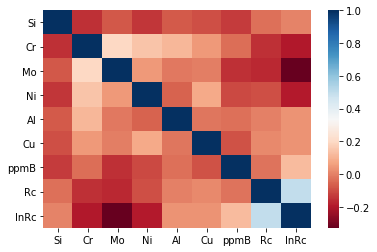

In [13]:
corr=xx.corr()
#corr
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")
corr

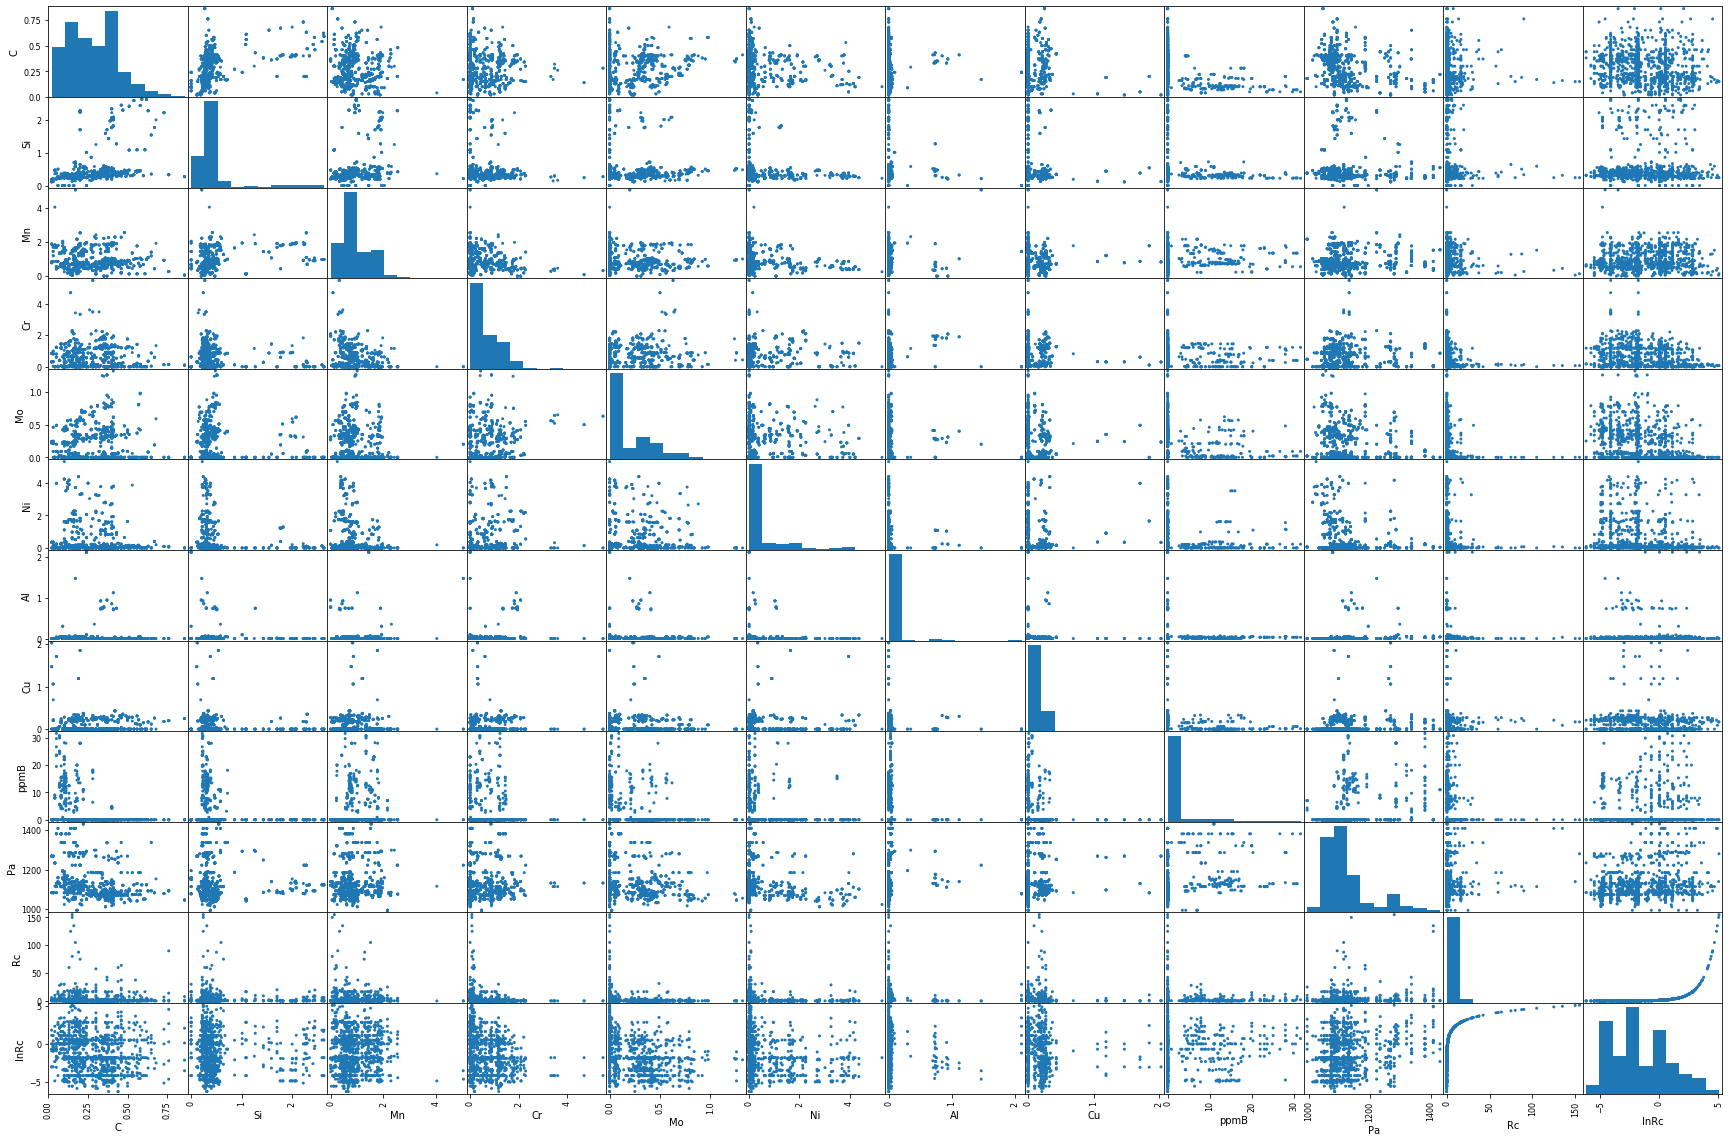

In [14]:
pd.plotting.scatter_matrix(x, alpha=1, figsize=(30, 20))
plt.show()

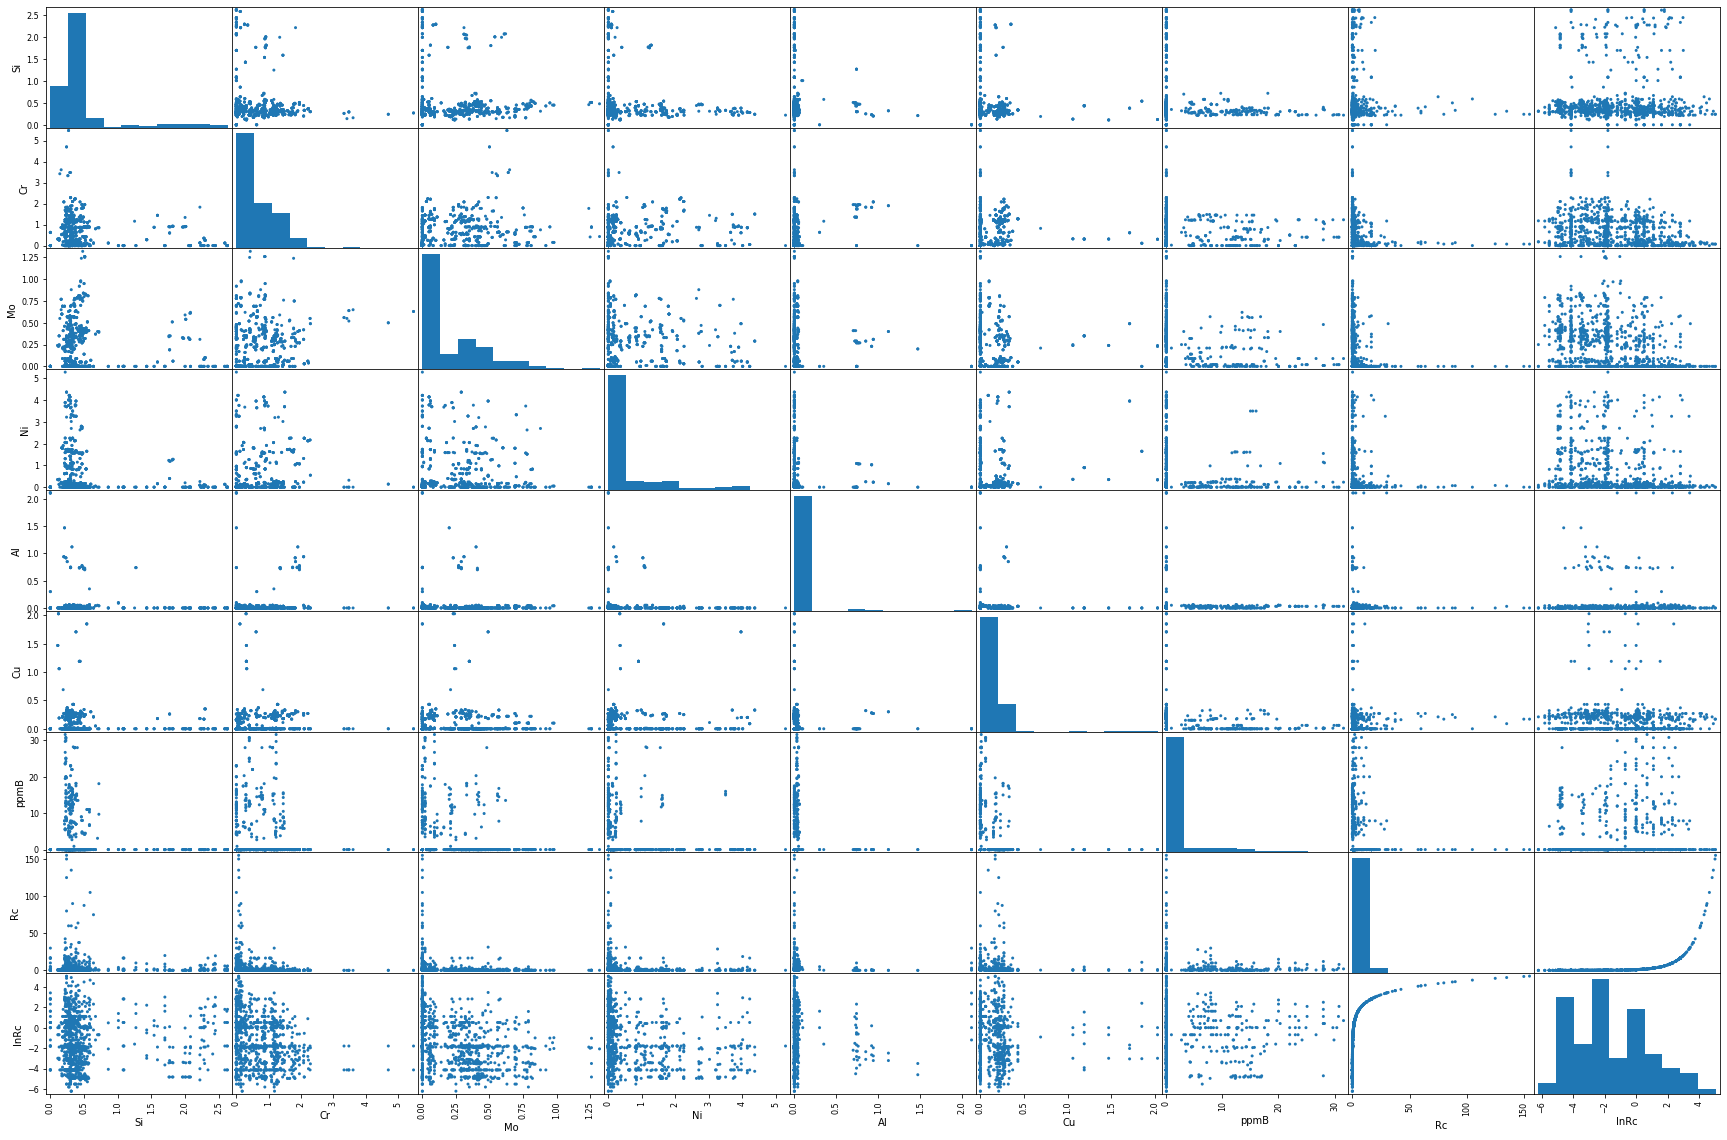

In [15]:
pd.plotting.scatter_matrix(xx, alpha=1, figsize=(30, 20))
plt.show()

In [16]:
x=dataframe.drop(['Texp','Steel','Pa', 'C', 'Mn'], axis = 1)
y=dataframe[['Texp']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)


In [17]:
regression_model=LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# y1 = b_0 + b_1{X_1}   + b_2{X_2}   +  b_3{X_3}    +  b_4{X_4}       .    .      .    b_k{X_k}
# y2 = b_0 + b_1{X_1_1} + b_2{X_1_2} +  b_3{X_1_3}  +  b_4{X_1_4}     .    .      .      .
# y3 = b_0 + b_1{X_2_1} + b_2{X_2_2} +  b_3{X_2_3}  +  b_4{X_2_4}     .    .      .      .
# y4 = b_0 + b_1{X_3_1} + b_2{X_3_2} +  b_3{X_3_3}  +  b_4{X_3_4}     .    .      .      .
# .     .       .             .             .              .          .    .      .      .
# .     .       .             .             .              .          .    .      .      .

# yn = b_0 +    .             .             .              .          .    .      .     b_k{X_n_k}



#y=texp       b_0       X_1=C        X_2=Si           X_3=Mn           X_4=Cr

# 770    =    b_0  +   b_1{0.13}   + b_2{0.27}   +  b_3{0.22}    +    b_4{0.8}
# 805    =    b_0  +   b_1{0.13}   + b_2{0.27}   +  b_3{0.22}    +    b_4{0.8}
# 825    =    b_0  +   b_1{0.13}   + b_2{0.27}   +  b_3{0.22}    +    b_4{0.8}
# 840    =    b_0  +   b_1{0.13}   + b_2{0.27}   +  b_3{0.21}    +    b_4{0.8}

#intercept
#coef of the regressors


In [115]:
intercept = regression_model.intercept_
coef=regression_model.coef_[0]

for cf in zip(x.columns, coef):
    print("The Coefficient for {} is {:2}".format(cf[0],cf[1]))

#intercept

The Coefficient for Si is -14.342515304481578
The Coefficient for Cr is -2.4522703108442254
The Coefficient for Mo is -12.58161817542824
The Coefficient for Ni is -23.5618329054723
The Coefficient for Al is 37.021112168226495
The Coefficient for Cu is 8.40135562931506
The Coefficient for ppmB is 1.3705372479463416
The Coefficient for Rc is -0.1817584594894937
The Coefficient for lnRc is -5.2762646524885275


In [116]:
y_predict=regression_model.predict(x_test)
y_predict[:9]

array([[716.57590416],
       [723.2385793 ],
       [723.08898991],
       [738.09413626],
       [741.23849978],
       [685.955506  ],
       [731.86918571],
       [738.17658   ],
       [757.88554904]])

In [117]:
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
est = model.fit()
est.resid

#est.params, intercept

#x2.head()
#sum(est.resid)
#intercept

0       71.893611
1       83.779531
2       88.126087
3       89.289823
4       90.799322
          ...    
1267    -2.549938
1268    13.012004
1269    23.943400
1270   -91.916211
1271   -54.434448
Length: 1272, dtype: float64

In [118]:
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog)

if pval>0.05:
    print('For the whites test')
    print("the p-value was {:.4}").format(pval)
    print("we fail to reject the null hypothesis, so there is no heteroscedasticity, \n")

else:
    print('For the whites test')
    print("the p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, so there is heteroscedasticity, \n")
    

    
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)

if pval>0.05:
    print('For the whites test')
    print("the p-value was {:.4}").format(pval)
    print("we fail to reject the null hypothesis, so there is no heteroscedasticity, \n")

else:
    print('For the breuschpagan test')
    print("the p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, so there is heteroscedasticity, \n")

For the whites test
the p-value was 7.148e-36
we reject the null hypothesis, so there is heteroscedasticity, 

For the breuschpagan test
the p-value was 1.091e-10
we reject the null hypothesis, so there is heteroscedasticity, 



<function matplotlib.pyplot.show(*args, **kw)>

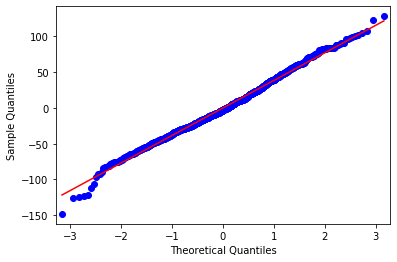

In [119]:
#Checking for normal distribution

sm.qqplot(est.resid, line='s')
pylab.show

In [120]:
#checking the mean of the residuals

mean_residuals = sum(est.resid)/len(est.resid)
mean_residuals

-2.4238891816118137e-13

In [121]:
model_mse=mean_squared_error(y_test, y_predict)
model_mae=mean_absolute_error(y_test, y_predict)
model_rmse=math.sqrt(model_mse)

model_mse, model_mae, model_rmse
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 1667.5745299183645
MAE 33.09713877087057
RMSE 40.83594654123208


In [122]:
#A larger MSE means that the data values are dispersed widely around 
#its central moment (mean), and a smaller MSE means otherwise 
#and it is definitely the preferred and/or desired choice as it shows that 
#your data values are dispersed closely to its central moment (mean); which is usually great

In [123]:
model_r2 = r2_score(y_test, y_predict)
model_r2

0.31520247623916353

In [124]:
#After fitting a linear regression model, you need to determine how well the model fits the data. 
#Does it do a good job of explaining changes in the dependent variable? 
#Usually, the larger the R2, the better the regression model fits your observations.

In [21]:
#ridge_regression

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


dataframe_low = Ridge(alpha=0.01)
dataframe_low.fit(x_train, y_train)

y_train_pred = dataframe_low.predict(x_train)
train_dataframe_low_mse = mean_squared_error(y_train, y_train_pred)
print('--- Ridge Regression with alpha = 0.01 ---')
print('In-sample MSE = ', round(train_dataframe_low_mse, 2))

y_test_pred = dataframe_low.predict(x_test)
test_dataframe_low_mse = mean_squared_error(y_test, y_test_pred)
print('--- Ridge Regression with alpha = 0.01 ---')
print('Out-sample MSE = ', round(test_dataframe_low_mse, 2))

regressor=RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], store_cv_values = True)
regressor.fit(x_train, y_train)

cv_mse = np.mean(regressor.cv_values_, axis = 0)
print(cv_mse)


--- Ridge Regression with alpha = 0.01 ---
In-sample MSE =  1439.92
--- Ridge Regression with alpha = 0.01 ---
Out-sample MSE =  1667.59
[[1472.52635239 1472.52619585 1472.52463591 1472.50958825 1472.41031816
  1474.14720976]]


1.0


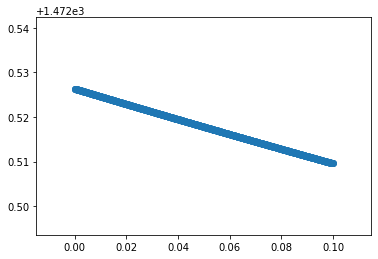

In [138]:
print(regressor.alpha_)

alph = np.r_[1:1000]/10000
regressor = RidgeCV(alphas = alph, store_cv_values = True)
regressor.fit (x_train, y_train)

cv_mse = np.mean(regressor.cv_values_, axis=0)

plt.scatter(alph, cv_mse);
plt.show()

In [139]:
best_alpha = regressor.alpha_
print(best_alpha)

0.0999


In [140]:
dataframe_best = Ridge(alpha = best_alpha)
dataframe_best.fit(x_train, y_train)

Ridge(alpha=0.0999, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [146]:

y_train_pred = dataframe_best.predict(x_train)
train_dataframe_best_mse = mean_squared_error(y_train, y_train_pred)
print('--- Ridge Regression with best alpha ---')
print('In-sample MSE = ', round(train_rr_best_mse, 2))


y_test_pred = dataframe_best.predict(x_test)
test_dataframe_best_mse = mean_squared_error(y_test, y_test_pred)
print('--- Ridge Regression with alpha = 0.01 ---')
print('Out-sample MSE = ', round(test_dataframe_best_mse, 2))

--- Ridge Regression with best alpha ---
In-sample MSE =  1439.92
--- Ridge Regression with alpha = 0.01 ---
Out-sample MSE =  1667.73


In [147]:
print(r2_score(y_test, y_test_pred))

0.3151392108588903


In [32]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    predictors=['x']

    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [34]:
#col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
#coef_matrix_simple = pd.DataFrame(index=ind, columns=col)